<a href="https://colab.research.google.com/github/m-aliabbas/EvolutionaryComputing/blob/master/Resnet34PreTrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import fastai
from fastai.vision import *
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
from zipfile import ZipFile 
def unZip(file_name):
  with ZipFile(file_name, 'r') as zip: 
      zip.extractall() 
      print('Done!') 

In [0]:
!rm -rf chest_xray
!rm -rf dataset1

In [0]:
file_name = '/content/drive/chestXRay.zip'

In [0]:
path="/content/drive/My Drive/"
file_name=path+'chestXRay.zip'

In [0]:
unZip(file_name)

Done!


In [0]:
!ls chest_xray

ls: cannot access 'chest_xray': No such file or directory


In [0]:
!ls

chest_xray.zip	drive  __MACOSX  sample_data


In [0]:
unZip('chest_xray.zip')

Done!


In [0]:
!ls chest_xray

test  train  val


In [0]:
import glob
import cv2
import numpy as np
%matplotlib inline
filesPos= sorted(glob.glob('chest_xray/train/NORMAL/*.jpeg'))
filesNeg=sorted(glob.glob('chest_xray/train/PNEUMONIA/*.jpeg'))

In [0]:
print(len(filesPos),len(filesNeg))

1341 3875


In [0]:
from fastai import *
import shutil
def copyfiles(filesName,dest):
  c=0
  for file in filesName:
    shutil.copy(file, dest)
    c+=1
  print("Copied "+str(c))

In [0]:
!mkdir dataset1

In [0]:
!mkdir dataset1/train

In [0]:
!ls dataset1

train


In [0]:
!mkdir dataset1/train/PNEUMONIA
!mkdir dataset1/train/NORMAL

In [0]:
!ls dataset1/train/

NORMAL	PNEUMONIA


In [0]:
filesNeg=filesNeg[:1340]

In [0]:
import random 
random.seed(3000)
random.shuffle(filesNeg)
random.shuffle(filesPos)

In [0]:
!ls chest_xray

test  train  val


In [0]:
copyfiles(filesPos,'dataset1/train/NORMAL')

Copied 1341


In [0]:
copyfiles(filesNeg,'dataset1/train/PNEUMONIA')

Copied 1340


In [0]:
!mkdir dataset1/valid

In [0]:
!mkdir dataset1/test

In [0]:
!cp -r chest_xray/val dataset1/

In [0]:
!cp -r chest_xray/test dataset1/

In [0]:
!rm -rf dataset1/valid

In [0]:
!mv dataset1/val dataset1/valid

In [0]:
np.random.seed(1234)
path='dataset1'
data = ImageDataBunch.from_folder(path,
        ds_tfms=get_transforms(do_flip=True,max_lighting=0.1),
        seed=1234,
        valid_pct=0.2,                          
        size=224,
        num_workers=8,
        bs=32,
        test="test")


In [0]:
data

ImageDataBunch;

Train: LabelList (2657 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: dataset1;

Valid: LabelList (664 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,NORMAL,PNEUMONIA,NORMAL,PNEUMONIA
Path: dataset1;

Test: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: dataset1

In [0]:
data.classes

['NORMAL', 'PNEUMONIA']

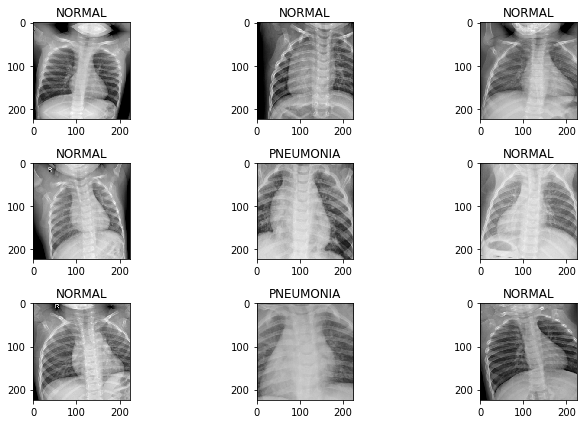

In [0]:
data.show_batch(rows=3, figsize=(10,6), hide_axis=False)

In [0]:
from sklearn.metrics import roc_auc_score,f1_score
def f1_score_a(y_pred,y_true,tens=True):
#     score=roc_auc_score(y_true,torch.sigmoid(y_pred)[:,1])
    f1a_score=f1_score(y_true, np.round(torch.sigmoid(y_pred)[:,1]), average='macro') 
    if tens:
#         score=tensor(score)
        f1a_score=tensor(f1a_score)
    else:
        f1a_score=f1a_score
    return f1a_score
# from sklearn.metrics import f1_score
# def f1_out(y_ture,y_pred,tens=True):
#     f1a_score=f1_score(y_true, torch.sigmoid(y_pred)[:,1], average='macro') 
#     if tens:
#         f1a_score=tensor(f1a_score)
#     else:
#         f1a_score=f1a_score
#     return f1a_score

In [0]:

import torch 
import torchvision
resnet34PT = torchvision.models.resnet34(pretrained=True)

In [0]:
num_ftrs = resnet34PT.fc.in_features
resnet34PT.fc=nn.Sequential(
    
    nn.Dropout(0.5),
    nn.Linear(num_ftrs, 128),
    nn.Dropout(0.3),
    nn.Linear(128, 2),
)

In [0]:
resnet34PT=resnet34PT.cuda()

In [0]:

auc=[]
loss=[]
aucc=[]
learn = Learner(data, resnet34PT, metrics=[error_rate, accuracy,f1_score_a])

In [0]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (2657 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: dataset1;

Valid: LabelList (664 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,NORMAL,PNEUMONIA,NORMAL,PNEUMONIA
Path: dataset1;

Test: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: dataset1, model=ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1

In [0]:
from fastai.callbacks import *
learn.fit_one_cycle(10,0.0003,callbacks=[SaveModelCallback(learn, every='imrpovement', monitor='f1_score_a')])

/usr/local/lib/python3.6/dist-packages/fastai/callbacks/tracker.py:83: UserWarning: SaveModel every imrpovement is invalid, falling back to "improvement".
  warn(f'SaveModel every {self.every} is invalid, falling back to "improvement".')


epoch,train_loss,valid_loss,error_rate,accuracy,f1_score_a,time
0,0.270930,0.154102,0.064759,0.935241,0.939707,02:50
1,0.185373,0.153030,0.051205,0.948795,0.940243,02:49
2,0.170630,0.180120,0.070783,0.929217,0.931347,02:53
3,0.145809,0.152893,0.057229,0.942771,0.935400,02:51
4,0.122568,0.086045,0.036145,0.963855,0.964700,02:50
5,0.096647,0.085427,0.034639,0.965361,0.967740,02:50
6,0.089063,0.178640,0.063253,0.936747,0.931259,02:51
7,0.066811,0.065713,0.025602,0.974398,0.970804,02:50
8,0.057525,0.053712,0.016566,0.983434,0.981572,02:51
9,0.046645,0.062885,0.018072,0.981928,0.978538,02:50


Better model found at epoch 0 with f1_score_a value: 0.9397073984146118.
Better model found at epoch 1 with f1_score_a value: 0.9402427077293396.
Better model found at epoch 4 with f1_score_a value: 0.9646998047828674.
Better model found at epoch 5 with f1_score_a value: 0.9677397012710571.
Better model found at epoch 7 with f1_score_a value: 0.9708038568496704.
Better model found at epoch 8 with f1_score_a value: 0.9815719723701477.


In [0]:
lossArray=[]

lossArray.append(learn.recorder.losses)

In [0]:
auc=[]
auc.append(learn.recorder.metrics)


In [0]:
auc

[[[tensor(0.0648), tensor(0.9352), tensor(0.9397)],
  [tensor(0.0512), tensor(0.9488), tensor(0.9402)],
  [tensor(0.0708), tensor(0.9292), tensor(0.9313)],
  [tensor(0.0572), tensor(0.9428), tensor(0.9354)],
  [tensor(0.0361), tensor(0.9639), tensor(0.9647)],
  [tensor(0.0346), tensor(0.9654), tensor(0.9677)],
  [tensor(0.0633), tensor(0.9367), tensor(0.9313)],
  [tensor(0.0256), tensor(0.9744), tensor(0.9708)],
  [tensor(0.0166), tensor(0.9834), tensor(0.9816)],
  [tensor(0.0181), tensor(0.9819), tensor(0.9785)]]]

In [0]:
learn.load('bestmodel')

Learner(data=ImageDataBunch;

Train: LabelList (2657 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: dataset1;

Valid: LabelList (664 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,NORMAL,PNEUMONIA,NORMAL,PNEUMONIA
Path: dataset1;

Test: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: dataset1, model=ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


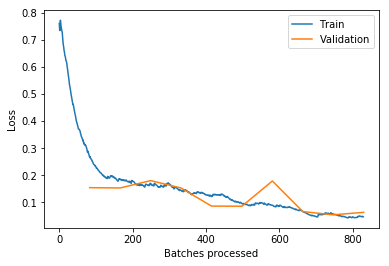

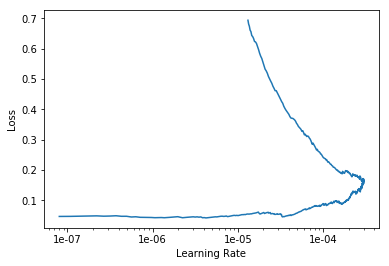

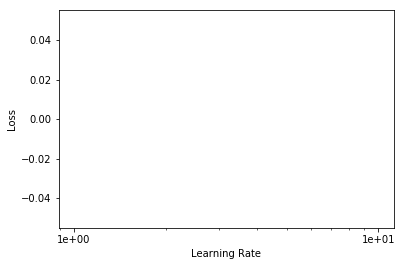

In [0]:

learn.recorder.plot_losses()
learn.recorder.plot(show_momentum=True)
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.load('bestmodel')

Learner(data=ImageDataBunch;

Train: LabelList (2657 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: dataset1;

Valid: LabelList (664 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,NORMAL,PNEUMONIA,NORMAL,PNEUMONIA
Path: dataset1;

Test: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: dataset1, model=ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1

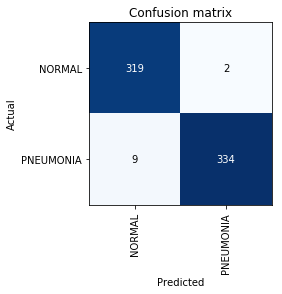

In [0]:

learn.load('bestmodel')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [0]:
# learn.load('Res')

In [0]:
# learn.lr_find()
# # learn.recorder.plot()

In [0]:
# learn.fit_one_cycle(20,max_lr=(1e-07),wd=0.25)

In [0]:
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()

In [0]:
# learn.lr_find()

In [0]:
# learn.recorder.plot()

In [56]:
conf=interp.confusion_matrix()
TrueNagitive=conf[0][0]
FalseNegative=conf[0][1]
TruePositive=conf[1][1]
FalsePositive=conf[1][0]
recal=TruePositive/(TruePositive+FalseNegative)
precision=TruePositive/(TruePositive+FalsePositive)
print("Precision of Model =",precision,"Recall of Model ", recal)
f1=2*((precision*recal)/(precision+recal))
print('F1 Score of Model =',f1)

Precision of Model = 0.9737609329446064 Recall of Model  0.9940476190476191
F1 Score of Model = 0.98379970544919
